# This code is trial for getting one day prediction at a time and increase the training set after that 


# Import Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import RobustScaler

# Check for GPU 


In [1]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# GPU Configuration
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU usage


NameError: name 'os' is not defined

# Hyperparameter


In [ ]:

split = 0.85
sequence_length = 60
epochs = 50
learning_rate = 0.0001

In [ ]:
# Define buffer size (number of past samples to keep)
buffer_size = sequence_length  

# Initialize empty buffers
data_buffer_X = []  # Stores input features
data_buffer_y = []  # Stores target values (labels)


# Loading stock price data

In [ ]:
# stock_data = pd.read_csv("stock_price.csv")
stock_data = pd.read_csv("gold_price.csv")
column = ['Close']
columns_to_load = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


# Data preparation

In [ ]:
len_stock_data = stock_data.shape[0]
train_examples = int(len_stock_data * split)

train = stock_data.get(column).values[:train_examples]
test = stock_data.get(column).values[train_examples:]

len_train = train.shape[0]
len_test = test.shape[0]

# EMA SCALER



In [ ]:
# import numpy as np

# class EMAScaler:
#     def __init__(self, alpha=0.1):
#         """
#         Initialize the Exponential Moving Average Scaler.
#         :param alpha: Smoothing factor (0 < alpha <= 1). Higher values give more weight to recent data.
#         """
#         self.alpha = alpha
#         self.mean = None
#         self.var = None

#     def partial_fit(self, X):
#         """
#         Update the scaler with new data.
#         :param X: New data (numpy array or similar).
#         """
#         mean_new = np.mean(X, axis=0)
#         var_new = np.var(X, axis=0)

#         if self.mean is None:
#             self.mean = mean_new
#             self.var = var_new
#         else:
#             self.mean = self.alpha * mean_new + (1 - self.alpha) * self.mean
#             self.var = self.alpha * var_new + (1 - self.alpha) * self.var

#     def transform(self, X):
#         """
#         Scale the input data using the current mean and variance.
#         :param X: Data to be scaled.
#         :return: Scaled data.
#         """
#         return (X - self.mean) / np.sqrt(self.var + 1e-8)

#     def fit_transform(self, X):
#         """
#         Update the scaler and transform the data in one step.
#         :param X: Data to be scaled.
#         :return: Scaled data.
#         """
#         self.partial_fit(X)
#         return self.transform(X)

# Scaling with EMA scaler


In [ ]:
# scaler = EMAScaler(alpha=0.1)
# train_scaled = scaler.fit_transform(train.reshape(-1, 1))
# test_scaled = scaler.transform(test.reshape(-1, 1))

In [ ]:
# train_scaled = np.log1p(train.reshape(-1, 1))
# test_scaled = np.log1p(test.reshape(-1, 1))
# scaler = RobustScaler()
# scaler.fit(train)  

# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

# train_scaled = train/1e5
# test_scaled = test/1e5
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.partial_fit(train)
# train_scaled = scaler.transform(train)
# test_scaled = scaler.transform(test)




# Initialize and fit scaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))


In [ ]:
print(train_scaled[0:len_train])
print(test_scaled[0:len_test])

In [ ]:
print("Last 10 data of train set ")
print(train_scaled[-10:])
print("\n\n\first 10 data of test set ")
print(test_scaled[:10])
print("\n\n\n")

# Prepare training data



In [ ]:
X_train = []
y_train = []
for i in range(len_train - sequence_length):
    X_train.append(train_scaled[i:i + sequence_length].flatten())
    y_train.append(train_scaled[i + sequence_length])
X_train = np.array(X_train)
y_train = np.array(y_train)

# data_buffer_X.append(X_train[0:9])

# data_buffer_y.append(y_train[0:9])

In [ ]:
print(X_train[-1])
print(y_train[-1])
print("\n\n\n")

# Prepare test data



In [ ]:
X_test = []
y_test = []
for i in range(len_test - sequence_length):
    X_test.append(test_scaled[i:i + sequence_length].flatten())
    y_test.append(test_scaled[i + sequence_length])
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print(X_test[:1])
print(y_test[:1])
print("\n\n\n")

# Store original y_test values for evaluation


In [ ]:
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
# y_test_original = np.expm1(y_test.reshape(-1, 1))
# y_test_original = y_test*1e5
# y_test_original = scaler.inverse_transform(y_test)


# XAU_USD15 DATASET


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the new dataset
stock_data = pd.read_csv("XAU_15m_data.csv", delimiter=";")

# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y.%m.%d %H:%M')

# Sort the data by date (if not already sorted)
stock_data = stock_data.sort_values(by='Date')

# Extract only the 'Close' column
close_prices = stock_data['Close'].values.reshape(-1, 1)  # Reshape to 2D array for scaling

# Split the data into training and testing sets
split = 0.8  # Example value, adjust as needed
len_stock_data = len(close_prices)
train_examples = int(len_stock_data * split)

train = close_prices[:train_examples]
test = close_prices[train_examples:]

len_train = len(train)
len_test = len(test)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Define sequence length (same as in the original code)
sequence_length = 10  # Example value, adjust as needed

# Create sequences for training data
X_train = []
y_train = []
for i in range(len_train - sequence_length):
    X_train.append(train_scaled[i:i + sequence_length].flatten())  # Flatten the sequence
    y_train.append(train_scaled[i + sequence_length])
X_train = np.array(X_train)
y_train = np.array(y_train)

# Create sequences for testing data
X_test = []
y_test = []
for i in range(len_test - sequence_length):
    X_test.append(test_scaled[i:i + sequence_length].flatten())  # Flatten the sequence
    y_test.append(test_scaled[i + sequence_length])
X_test = np.array(X_test)
y_test = np.array(y_test)

# Inverse transform for original values (if needed)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Direction Accuracy Method


In [ ]:
def calculate_direction_accuracy(actual_values, predicted_values):
    """
    Calculate accuracy of predicted price movement direction
    Returns: accuracy and arrays of actual and predicted directions
    """
    # Calculate actual price movements (1 for up, 0 for down)
    actual_direction = (actual_values[1:] > actual_values[:-1]).astype(int)

    # Calculate predicted price movements (1 for up, 0 for down)
    predicted_direction = (predicted_values[1:] > predicted_values[:-1]).astype(int)

    # Calculate accuracy
    direction_accuracy = np.mean(actual_direction == predicted_direction)

    return direction_accuracy, actual_direction, predicted_direction


# Model



In [ ]:
# def model_create(X_train1, y_train1):
#     tf.random.set_seed(1234)

#     model = tf.keras.models.Sequential(
#         [
#             tf.keras.Input(shape=(X_train.shape[1],)),
#             tf.keras.layers.Dense(units=50, activation="relu"),
#             tf.keras.layers.Dropout(0.1),
#             tf.keras.layers.Dense(units=30, activation="relu"),
#             tf.keras.layers.Dropout(0.05),
#             tf.keras.layers.Dense(units=20, activation="relu"),
#             tf.keras.layers.Dropout(0.01),
#             tf.keras.layers.Dense(units=1, activation="linear")
#         ]
#     )

#     model.compile(
#         loss=tf.keras.losses.MeanSquaredError(),
#         optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
#     )

#     early_stopping = tf.keras.callbacks.EarlyStopping(
#         monitor='loss',
#         patience=5,
#         restore_best_weights=True
#     )

#     model.fit(
#         X_train1, y_train1,
#         epochs=epochs,
#         batch_size=32,
#         callbacks=[early_stopping],
#         verbose=0
#     )
#     return model


In [ ]:
#creating LSTM model
def model_create(X_train1, y_train1):
    tf.random.set_seed(1234)
    model = tf.keras.models.Sequential(
        [
            tf.keras.Input(shape = (X_train.shape[1], 1)),
            tf.keras.layers.LSTM(units = 50, activation = "tanh", return_sequences = True),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.LSTM(units = 30, activation = "tanh", return_sequences = True),
            tf.keras.layers.Dropout(0.05),
            tf.keras.layers.LSTM(units = 20, activation = "tanh", return_sequences = False),
            tf.keras.layers.Dropout(0.01),
            tf.keras.layers.Dense(units = 1, activation = "linear")
        ]
    )

    # model.compile(
    #     loss = tf.keras.losses.mean_squared_error,
    #     optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    # )

    model.compile(
    loss=tf.keras.losses.MeanSquaredError(),  # Instantiate the loss class
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    )


    model.fit(
        X_train, y_train,
        epochs = epochs,
        verbose=0
    )
    return model

# Update Model


In [ ]:
def update_model(model, X_new, y_new):
    """
    Update the model with new data while keeping a buffer of old data.
    
    Parameters:
    - model: The trained TensorFlow/Keras model
    - X_new: New input data (features)
    - y_new: New output data (targets)
    
    Returns:
    - Updated model
    """
    global data_buffer_X, data_buffer_y  # Use global buffers

    # Convert new data to list format (if needed)
    X_new, y_new = list(X_new), list(y_new)

    # Add new data to buffer
    data_buffer_X.extend(X_new)
    data_buffer_y.extend(y_new)

    # Keep only the last `buffer_size` samples
    # if len(data_buffer_X) > buffer_size:
    #     data_buffer_X = data_buffer_X[-buffer_size:]  # Remove old data
    #     data_buffer_y = data_buffer_y[-buffer_size:]

    # Convert buffers to NumPy arrays
    X_train = np.array(data_buffer_X)
    y_train = np.array(data_buffer_y)

    # Train the model on buffered data
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

    return model  # Return updated model


# Evaluation 
## With the graphs 

In [ ]:

def evaluate(predictions):
    mae = mean_absolute_error(y_test_original, predictions)
    mape = mean_absolute_percentage_error(y_test_original, predictions)

    # Calculate direction accuracy
    dir_acc, actual_dir, pred_dir = calculate_direction_accuracy(y_test_original, predictions)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Price predictions
    ax1.plot(y_test_original, label="Actual Values", color="blue", marker='o')
    ax1.plot(predictions, label="Predicted Values", color="red",
            linestyle='dashed', marker='x')
    ax1.set_title("Comparison of Predicted vs Actual Values")
    ax1.set_xlabel("Sample Index")
    ax1.set_ylabel("Price")
    ax1.legend()
    ax1.grid(True)

    # Plot 2: Direction predictions
    ax2.plot(actual_dir, label="Actual Direction", color="blue", marker='o')
    ax2.plot(pred_dir, label="Predicted Direction", color="red",
            linestyle='dashed', marker='x')
    ax2.set_title("Comparison of Predicted vs Actual Price Direction (1=Up, 0=Down)")
    ax2.set_xlabel("Sample Index")
    ax2.set_ylabel("Direction")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    return mae, mape, (1 - mape), dir_acc

# Run Model 


In [ ]:

def run_model(n):
    total_mae = total_mape = total_acc = total_dir_acc = 0
    results = np.zeros((len_test - sequence_length, 1))

    global data_buffer_X, data_buffer_y

    for iteration in range(n):
        # Create and train initial model
        model = model_create(X_train, y_train)

        for j in range(len_test - sequence_length):
            current_input = X_test[j].reshape(1, sequence_length)
            prediction = model.predict(current_input, verbose=0)
            results[j] = scaler.inverse_transform(prediction.reshape(-1, 1))
            # results[j] = np.expm1(prediction.reshape(-1, 1))
            # results[j] = prediction*1e5
            # results[j] = scaler.inverse_transform(prediction)
            # Add new sample to buffer
#             actual = y_test[j].reshape(1, 1)
# # Add new data to buffer
#             if len(data_buffer_X) >= sequence_length:
#                 # Remove first element if buffer is full
#                 data_buffer_X.pop(0)
#                 data_buffer_y.pop(0)
            
#             # # Append new data
#             # data_buffer_X.append(current_input)
#             # data_buffer_y.append(actual)
            
#             # # Update model if we have at least some minimum data
#             # min_samples_to_train = 10  # You can adjust this value
#             # if len(data_buffer_X) >= min_samples_to_train:
#             #     # Convert buffer to NumPy arrays
#             #     X_train_new = np.vstack(data_buffer_X)
#             #     y_train_new = np.vstack(data_buffer_y)
                
#                 # Update the model with buffered data
#             model = update_model(model, current_input, actual)
    

            if j < len_test - sequence_length - 1:
                actual = y_test[j].reshape(1, 1)
                model.fit(current_input,
                         actual,
                         epochs=20,
                         verbose=0)
                

        mae, mape, acc, dir_acc = evaluate(results)
        total_mae += mae
        total_mape += mape
        total_acc += acc
        total_dir_acc += dir_acc

        print(f"Iteration {iteration + 1}:")
        print(f"MAE: {mae}")
        print(f"MAPE: {mape}")
        print(f"Price Accuracy: {acc}")
        print(f"Direction Accuracy: {dir_acc}\n")

    return (total_mae/n), (total_mape/n), (total_acc/n), (total_dir_acc/n), results.tolist()


# Main


In [ ]:
print("Starting model training and evaluation...")
mae, mape, acc, dir_acc, preds = run_model(1)

print("\nFinal Results:")
print(f"Mean Absolute Error = {mae}")
print(f"Mean Absolute Percentage Error = {mape}")
print(f"Price Accuracy = {acc}")
print(f"Direction Accuracy = {dir_acc}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
import matplotlib.pyplot as plt
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# GPU Configuration
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)

# Hyperparameters
split = 0.85
sequence_length = 20
epochs = 50
learning_rate = 0.0001

# Load data
stock_data = pd.read_csv("gold_price.csv")
column = ['Close']

len_stock_data = stock_data.shape[0]
train_examples = int(len_stock_data * split)

train = stock_data[column].values[:train_examples]
test = stock_data[column].values[train_examples:]

len_train = train.shape[0]
len_test = test.shape[0]

# Check dataset size
if len_train < 2 * sequence_length or len_test < 2 * sequence_length:
    raise ValueError(f"Dataset is too small for sequence_length={sequence_length}. "
                    f"Need at least {2 * sequence_length} samples.")

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

# Prepare sequences for training
X_train = []
y_train = []
for i in range(len_train - 2 * sequence_length + 1):  # Adjusted for sequence output
    X_train.append(train_scaled[i:i + sequence_length].flatten())
    y_train.append(train_scaled[i + sequence_length:i + 2 * sequence_length].flatten())
X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare sequences for testing
X_test = []
y_test = []
for i in range(len_test - 2 * sequence_length + 1):  # Adjusted for sequence output
    X_test.append(test_scaled[i:i + sequence_length].flatten())
    y_test.append(test_scaled[i + sequence_length:i + 2 * sequence_length].flatten())
X_test = np.array(X_test)
y_test = np.array(y_test)

# Inverse transform for original values
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create LSTM model
def model_create(X_train, y_train):
    tf.random.set_seed(1234)
    model = tf.keras.models.Sequential(
        [
            tf.keras.Input(shape=(X_train.shape[1], 1)),
            tf.keras.layers.LSTM(units=50, activation="tanh", return_sequences=True),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.LSTM(units=30, activation="tanh", return_sequences=True),
            tf.keras.layers.Dropout(0.05),
            tf.keras.layers.LSTM(units=20, activation="tanh", return_sequences=False),
            tf.keras.layers.Dropout(0.01),
            tf.keras.layers.Dense(units=sequence_length, activation="linear")  # Predict sequence
        ]
    )

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    )

    model.fit(
        X_train, y_train,
        epochs=epochs,
        verbose=0
    )
    return model

def calculate_direction_accuracy(actual_values, predicted_values):
    """
    Calculate accuracy of predicted price movement direction.
    Returns: accuracy and arrays of actual and predicted directions.
    """
    # Calculate actual price movements (1 for up, 0 for down)
    actual_direction = (actual_values[1:] > actual_values[:-1]).astype(int)

    # Calculate predicted price movements (1 for up, 0 for down)
    predicted_direction = (predicted_values[1:] > predicted_values[:-1]).astype(int)

    # Calculate accuracy
    direction_accuracy = np.mean(actual_direction == predicted_direction)

    return direction_accuracy, actual_direction, predicted_direction

# Evaluate predictions
def evaluate(predictions):
    # Flatten predictions to match y_test_original
    predictions_flat = predictions.flatten()
    
    # Reshape y_test_original to match the number of samples in predictions_flat
    y_test_flat = y_test_original[:len(predictions_flat)].flatten()
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test_flat, predictions_flat)
    mape = mean_absolute_percentage_error(y_test_flat, predictions_flat)

    # Calculate direction accuracy
    dir_acc, actual_dir, pred_dir = calculate_direction_accuracy(y_test_flat, predictions_flat)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Price predictions
    ax1.plot(y_test_flat, label="Actual Values", color="blue", marker='o')
    ax1.plot(predictions_flat, label="Predicted Values", color="red", linestyle='dashed', marker='x')
    ax1.set_title("Comparison of Predicted vs Actual Values")
    ax1.set_xlabel("Sample Index")
    ax1.set_ylabel("Price")
    ax1.legend()
    ax1.grid(True)

    # Plot 2: Direction predictions
    ax2.plot(actual_dir, label="Actual Direction", color="blue", marker='o')
    ax2.plot(pred_dir, label="Predicted Direction", color="red", linestyle='dashed', marker='x')
    ax2.set_title("Comparison of Predicted vs Actual Price Direction (1=Up, 0=Down)")
    ax2.set_xlabel("Sample Index")
    ax2.set_ylabel("Direction")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    return mae, mape, (1 - mape), dir_acc

# Run model
def run_model(n):
    total_mae = total_mape = total_acc = total_dir_acc = 0
    results = np.zeros((len(X_test), sequence_length))  # Initialize results with correct shape

    for iteration in range(n):
        # Create and train initial model
        model = model_create(X_train, y_train)

        for j in range(len(X_test)):  # Use len(X_test) instead of len_test - sequence_length
            current_input = X_test[j].reshape(1, sequence_length)
            prediction = model.predict(current_input, verbose=0)
            
            # Reshape prediction to (sequence_length,) before storing in results
            results[j] = scaler.inverse_transform(prediction.reshape(-1, 1)).flatten()

            if j < len(X_test) - 1:  # Update the condition for retraining
                actual = y_test[j].reshape(1, sequence_length)
                model.fit(current_input, actual, epochs=20, verbose=0)

        mae, mape, acc, dir_acc = evaluate(results)
        total_mae += mae
        total_mape += mape
        total_acc += acc
        total_dir_acc += dir_acc

        print(f"Iteration {iteration + 1}:")
        print(f"MAE: {mae}")
        print(f"MAPE: {mape}")
        print(f"Price Accuracy: {acc}")
        print(f"Direction Accuracy: {dir_acc}\n")

    return (total_mae / n), (total_mape / n), (total_acc / n), (total_dir_acc / n), results.tolist()

# Run the model
mae, mape, acc, dir_acc, results = run_model(1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
import matplotlib.pyplot as plt
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# GPU Configuration
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)

# Hyperparameters
split = 0.85
sequence_length = 10
epochs = 50
learning_rate = 0.0001

# Load data
stock_data = pd.read_csv("gold_price.csv")
column = ['Close']

len_stock_data = stock_data.shape[0]
train_examples = int(len_stock_data * split)

train = stock_data[column].values[:train_examples]
test = stock_data[column].values[train_examples:]

len_train = train.shape[0]
len_test = test.shape[0]

# Check dataset size
if len_train < 2 * sequence_length or len_test < 2 * sequence_length:
    raise ValueError(f"Dataset is too small for sequence_length={sequence_length}. "
                    f"Need at least {2 * sequence_length} samples.")

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

# Prepare sequences for training
X_train = []
y_train = []
for i in range(len_train - 2 * sequence_length + 1):  # Adjusted for sequence output
    X_train.append(train_scaled[i:i + sequence_length].flatten())
    y_train.append(train_scaled[i + sequence_length:i + 2 * sequence_length].flatten())
X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare sequences for testing
X_test = []
y_test = []
for i in range(len_test - 2 * sequence_length + 1):  # Adjusted for sequence output
    X_test.append(test_scaled[i:i + sequence_length].flatten())
    y_test.append(test_scaled[i + sequence_length:i + 2 * sequence_length].flatten())
X_test = np.array(X_test)
y_test = np.array(y_test)

# Inverse transform for original values
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create LSTM model
def model_create(X_train, y_train):
    tf.random.set_seed(1234)
    model = tf.keras.models.Sequential(
        [
            tf.keras.Input(shape=(X_train.shape[1], 1)),
            tf.keras.layers.LSTM(units=50, activation="tanh", return_sequences=True),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.LSTM(units=30, activation="tanh", return_sequences=True),
            tf.keras.layers.Dropout(0.05),
            tf.keras.layers.LSTM(units=20, activation="tanh", return_sequences=False),
            tf.keras.layers.Dropout(0.01),
            tf.keras.layers.Dense(units=sequence_length, activation="linear")  # Predict sequence
        ]
    )

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    )

    model.fit(
        X_train, y_train,
        epochs=epochs,
        verbose=0
    )
    return model

# Evaluate predictions
def evaluate(predictions):
    mae = mean_absolute_error(y_test_original, predictions)
    mape = mean_absolute_percentage_error(y_test_original, predictions)

    # Calculate direction accuracy
    dir_acc, actual_dir, pred_dir = calculate_direction_accuracy(y_test_original, predictions)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Price predictions
    ax1.plot(y_test_original, label="Actual Values", color="blue", marker='o')
    ax1.plot(predictions, label="Predicted Values", color="red", linestyle='dashed', marker='x')
    ax1.set_title("Comparison of Predicted vs Actual Values")
    ax1.set_xlabel("Sample Index")
    ax1.set_ylabel("Price")
    ax1.legend()
    ax1.grid(True)

    # Plot 2: Direction predictions
    ax2.plot(actual_dir, label="Actual Direction", color="blue", marker='o')
    ax2.plot(pred_dir, label="Predicted Direction", color="red", linestyle='dashed', marker='x')
    ax2.set_title("Comparison of Predicted vs Actual Price Direction (1=Up, 0=Down)")
    ax2.set_xlabel("Sample Index")
    ax2.set_ylabel("Direction")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    return mae, mape, (1 - mape), dir_acc

# Run model
def run_model(n):
    total_mae = total_mape = total_acc = total_dir_acc = 0
    results = np.zeros((len_test - sequence_length, sequence_length))

    for iteration in range(n):
        # Create and train initial model
        model = model_create(X_train, y_train)

        # for j in range(len_test - sequence_length):
        #     current_input = X_test[j].reshape(1, sequence_length)
        #     prediction = model.predict(current_input, verbose=0)
        #     results[j] = scaler.inverse_transform(prediction.reshape(-1, 1))

        #     if j < len_test - sequence_length - 1:
        #         actual = y_test[j].reshape(1, sequence_length)
        #         model.fit(current_input, actual, epochs=20, verbose=0)
        for j in range(len(X_test)):  # Use len(X_test) instead of len_test - sequence_length
            current_input = X_test[j].reshape(1, sequence_length)
            prediction = model.predict(current_input, verbose=0)
            
            # Reshape prediction to (sequence_length,) before storing in results
            results[j] = scaler.inverse_transform(prediction.reshape(-1, 1)).flatten()

            if j < len(X_test) - 1:  # Update the condition for retraining
                actual = y_test[j].reshape(1, sequence_length)
                model.fit(current_input, actual, epochs=20, verbose=0)

        mae, mape, acc, dir_acc = evaluate(results)
        total_mae += mae
        total_mape += mape
        total_acc += acc
        total_dir_acc += dir_acc

        print(f"Iteration {iteration + 1}:")
        print(f"MAE: {mae}")
        print(f"MAPE: {mape}")
        print(f"Price Accuracy: {acc}")
        print(f"Direction Accuracy: {dir_acc}\n")

    return (total_mae / n), (total_mape / n), (total_acc / n), (total_dir_acc / n), results.tolist()

# Run the model
mae, mape, acc, dir_acc, results = run_model(1)

# Claude


GPU memory growth enabled


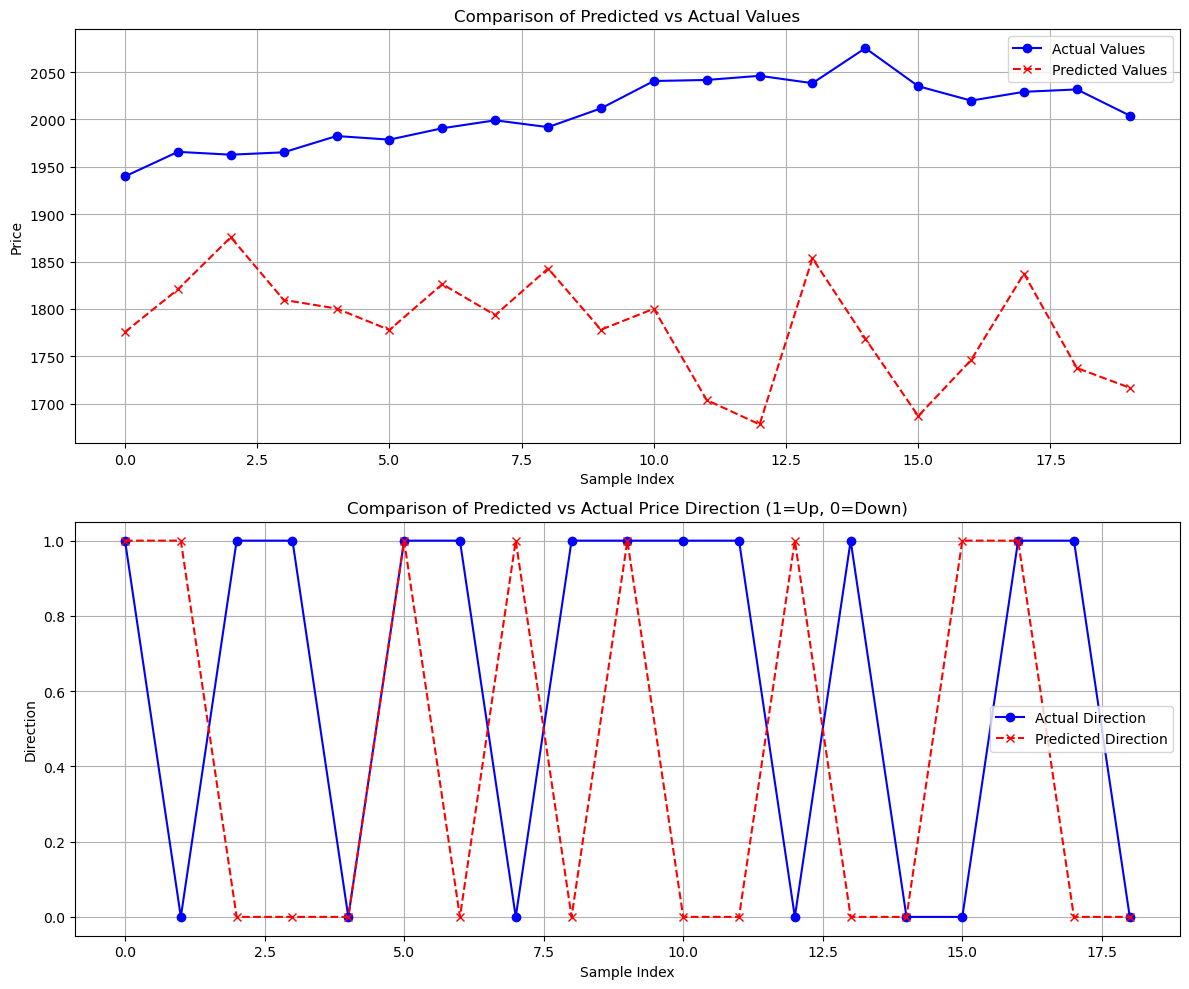

Iteration 1:
MAE: 226.14735107421865
MAPE: 0.11219043330133398
Price Accuracy: 0.8878095666986661
Direction Accuracy: 0.3684210526315789



In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
import matplotlib.pyplot as plt
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# GPU Configuration
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)

# Hyperparameters
split = 0.93
sequence_length = 20
epochs = 50
learning_rate = 0.0001

# Load data
stock_data = pd.read_csv("gold_price.csv")
column = ['Close']

len_stock_data = stock_data.shape[0]
train_examples = int(len_stock_data * split)

train = stock_data[column].values[:train_examples]
test = stock_data[column].values[train_examples:]

len_train = train.shape[0]
len_test = test.shape[0]

# Check dataset size
if len_train < 2 * sequence_length or len_test < 2 * sequence_length:
    raise ValueError(f"Dataset is too small for sequence_length={sequence_length}. "
                    f"Need at least {2 * sequence_length} samples.")

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

# Prepare sequences for training
X_train = []
y_train = []
for i in range(len_train - 2 * sequence_length + 1):  # Adjusted for sequence output
    X_train.append(train_scaled[i:i + sequence_length].flatten())
    y_train.append(train_scaled[i + sequence_length:i + 2 * sequence_length].flatten())
X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare sequences for testing
X_test = []
y_test = []
for i in range(len_test - 2 * sequence_length + 1):  # Adjusted for sequence output
    X_test.append(test_scaled[i:i + sequence_length].flatten())
    y_test.append(test_scaled[i + sequence_length:i + 2 * sequence_length].flatten())
X_test = np.array(X_test)
y_test = np.array(y_test)

# Inverse transform for original values
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create LSTM model
# def model_create(X_train, y_train):
#     tf.random.set_seed(1234)
#     model = tf.keras.models.Sequential(
#         [
#             tf.keras.Input(shape=(X_train.shape[1], 1)),
#             tf.keras.layers.LSTM(units=50, activation="tanh", return_sequences=True),
#             tf.keras.layers.Dropout(0.15),
#             tf.keras.layers.LSTM(units=30, activation="tanh", return_sequences=True),
#             tf.keras.layers.Dropout(0.05),
#             tf.keras.layers.LSTM(units=20, activation="tanh", return_sequences=False),
#             tf.keras.layers.Dropout(0.01),
#             tf.keras.layers.Dense(units=sequence_length, activation="linear")  # Predict sequence
#         ]
#     )

#     model.compile(
#         loss=tf.keras.losses.MeanSquaredError(),
#         optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#     )

#     model.fit(
#         X_train, y_train,
#         epochs=epochs,
#         verbose=0
#     )
#     return model
def model_create(X_train, y_train):
    model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.Input(shape=(X_train.shape[1], 1)),
    
    # First LSTM block
    tf.keras.layers.LSTM(units=64, activation="tanh", return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    # Second LSTM block
    tf.keras.layers.LSTM(units=50, activation="tanh", return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    # Third LSTM block (returns just the last output)
    tf.keras.layers.LSTM(units=30, activation="tanh", return_sequences=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    
    # Additional Dense block for further processing
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    
    # Final Dense layer for sequence prediction
    tf.keras.layers.Dense(units=sequence_length, activation="linear")
    ])

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
    )

    model.fit(
        X_train, y_train,
        epochs=epochs,
        verbose=0
    )
    return model


def calculate_direction_accuracy(y_true, y_pred):
    """
    Calculate the direction accuracy between actual and predicted values
    """
    # Calculate directions (1 for up, 0 for down)
    actual_dir = np.diff(y_true) > 0
    pred_dir = np.diff(y_pred) > 0
    
    # Calculate accuracy
    dir_acc = np.mean(actual_dir == pred_dir)
    
    return dir_acc, actual_dir, pred_dir

def evaluate_single_prediction(actual, predicted):
    """
    Evaluate a single prediction
    """
    mae = mean_absolute_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)

    # Calculate direction accuracy
    dir_acc, actual_dir, pred_dir = calculate_direction_accuracy(actual, predicted)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Price predictions
    ax1.plot(actual, label="Actual Values", color="blue", marker='o')
    ax1.plot(predicted, label="Predicted Values", color="red", linestyle='dashed', marker='x')
    ax1.set_title("Comparison of Predicted vs Actual Values")
    ax1.set_xlabel("Sample Index")
    ax1.set_ylabel("Price")
    ax1.legend()
    ax1.grid(True)

    # Plot 2: Direction predictions
    ax2.plot(actual_dir, label="Actual Direction", color="blue", marker='o')
    ax2.plot(pred_dir, label="Predicted Direction", color="red", linestyle='dashed', marker='x')
    ax2.set_title("Comparison of Predicted vs Actual Price Direction (1=Up, 0=Down)")
    ax2.set_xlabel("Sample Index")
    ax2.set_ylabel("Direction")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    return mae, mape, (1 - mape), dir_acc

def run_model(n):
    total_mae = total_mape = total_acc = total_dir_acc = 0

    for iteration in range(n):
        # Create and train initial model
        model = model_create(X_train.reshape(-1, sequence_length, 1), y_train)

        # Predict for just the first test input
        current_input = X_test[0].reshape(1, sequence_length, 1)
        prediction = model.predict(current_input, verbose=0)
        
        # Inverse transform the prediction and actual values
        prediction_original = scaler.inverse_transform(prediction.reshape(-1, 1)).flatten()
        actual_original = scaler.inverse_transform(y_test[0].reshape(-1, 1)).flatten()

        # Evaluate the single prediction
        mae, mape, acc, dir_acc = evaluate_single_prediction(actual_original, prediction_original)
        
        total_mae += mae
        total_mape += mape
        total_acc += acc
        total_dir_acc += dir_acc

        print(f"Iteration {iteration + 1}:")
        print(f"MAE: {mae}")
        print(f"MAPE: {mape}")
        print(f"Price Accuracy: {acc}")
        print(f"Direction Accuracy: {dir_acc}\n")

    return (total_mae / n), (total_mape / n), (total_acc / n), (total_dir_acc / n), prediction_original.tolist()

# Run the model
mae, mape, acc, dir_acc, results = run_model(1)